In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Definition of the model

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    elif t>t_tresh and t<=1000:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    elif t>1000:
        B=0.2*np.exp(-(t-1000)/beta2)
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

# Integration of the differential equations

In [3]:
def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)

# Selecting italian region

In [117]:
###########################################################################    
fit_region = 'lombardia' # OPTIONS: 'nord', 'centro', 'sud', 'isole', 'italia', 'nolombardia', 'lombardia'
###########################################################################

# Load data

In [118]:
if fit_region =='nord':
    region    = ['Veneto','Emilia-Romagna','Liguria','Piemonte','Valle d\'Aosta','P.A. Trento','P.A. Bolzano','Friuli Venezia Giulia'] 
    n_regions = len(region)
elif fit_region =='centro':
    region    = ['Toscana','Marche','Umbria','Lazio','Abruzzo','Molise']
    n_regions = len(region)
elif fit_region =='sud':
    region    = ['Puglia','Calabria','Basilicata','Campania']
    n_regions = len(region)
elif fit_region =='isole':
    region    = ['Sicilia','Sardegna']
    n_regions = len(region)
elif  fit_region =='italia': 
    region    = 'Italia'
    n_regions = 1
elif fit_region =='nolombardia':
    region    = ['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna','Friuli Venezia Giulia','Lazio','Liguria','Marche','Molise','Piemonte','Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto']
    n_regions = len(region)    
elif fit_region =='lombardia':
    region    = ['Lombardia']
    n_regions = 1     

    
popolation_regions = np.array([  1304970,      559084,        533050,   1947131,   5801692,         4459477,                1215220,5879082, 1550640,    10060574,  1525271,  305617,    4356406, 4029053, 1639591,  4999891,  3729641,       541380,  882015,          125666, 4905854])
name_regions       = np.array(['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna','Friuli Venezia Giulia','Lazio','Liguria','Lombardia','Marche','Molise','Piemonte','Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto'])
regions            = np.vstack((name_regions,popolation_regions))

mask_reg = []
for i in range(n_regions):
    mask_reg.append(regions[0,:] == region[i])
mask_reg = np.array(mask_reg)
print(mask_reg.shape)

if region=='Italia':
    data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
    xdata=pd.to_numeric(range(data.shape[0]))
    ydata=data['totale_casi']
    ydata_death=data['deceduti']
    ydata_rec=data['dimessi_guariti']
    N = 60351305
    print('Popolation in the selected regions',N)
    print('ydata ',ydata, ydata.shape)
    print('xdata ',xdata,ydata.shape)
    
else:
    
    data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
    N = 0
    xxx = []
    yyy = []
    zzz = []
    for i in range(n_regions):
        N += int(regions[1,mask_reg[i]])
        mask_REG=data['denominazione_regione']==region[i]
        xxx.append(data.loc[mask_REG,'totale_casi'])
        yyy.append(data.loc[mask_REG,'deceduti'])
        zzz.append(data.loc[mask_REG,'dimessi_guariti'])

    ydata       = np.array(np.sum(xxx,axis=0))
    ydata_death = np.array(np.sum(yyy,axis=0))
    ydata_rec   = np.array(np.sum(zzz,axis=0))
    xdata       = pd.to_numeric(range(ydata.shape[0]))
    
    print('Popolation in the selected regions',N)
    print('ydata ',ydata, ydata.shape)
    print('ydata_death ',ydata_death, ydata_death.shape)
    print('ydata_rec ',ydata_rec, ydata_rec.shape)
    print('xdata ',xdata,ydata.shape)
print(popolation_regions.sum())

(1, 21)
Popolation in the selected regions 10060574
ydata  [  172   240   258   403   531   615   984  1254  1520  1820  2251  2612
  3420  4189  5469  5791  7280  8725  9820 11685 13272 14649 16220 17713
 19884 22264 25515 27206 28761 30703 32346 34889 37298 39415 41007 42161
 43208 44773 46065 47520 49118 50455 51534 52325 53414 54802 56048 57592
 59052 60314 61326 62153 63094 64135] (54,)
ydata_death  [    6     9     9    14    17    23    24    38    55    73    98   135
   154   267   333   468   617   744   890   966  1218  1420  1640  1959
  2168  2549  3095  3456  3776  4178  4474  4861  5402  5944  6360  6818
  7199  7593  7960  8311  8656  8905  9202  9484  9722 10022 10238 10511
 10621 10901 11142 11377 11608 11851] (54,)
ydata_rec  [    0     0     0    40    40    40    73   139   139   250   376   469
   524   550   646   896   900  1085  1198  1660  2011  2368  2485  3488
  3778  4295  5050  5865  6075  6657  7281  7839  8001  8962  9255 10337
 10885 11415 12229 13020 1

# Printing raw data

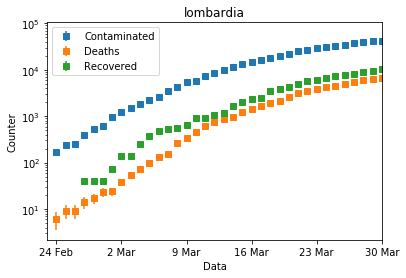

In [119]:
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='None',label='Recovered',marker='s')
plt.title(fit_region)
plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Counter')
plt.xticks(np.arange(0,50,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar'])
plt.xlim(-1,35)
plt.legend()
plt.savefig('output/Data_only_'+fit_region+'.png',dpi=300)
plt.show()

# Comparison between model and data

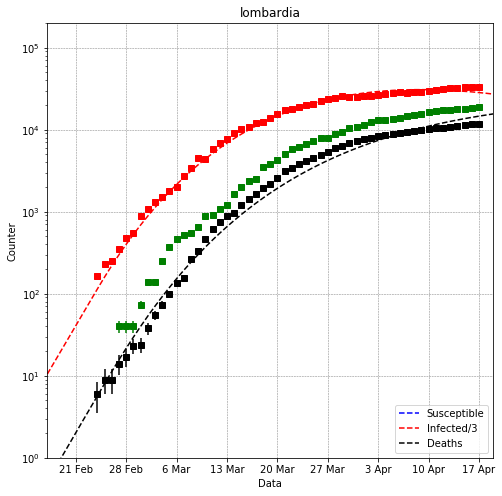

In [133]:
if fit_region =='nord':
    fin_result=time_evo(N,0.41,25.25,1/14,4.9,t_tresh=17,I0=2,t=np.arange(0,720)) # Nord + 0 giorni
    dt = 5
elif fit_region =='centro':
    fin_result=time_evo(N,0.41,24.6,1/14,3.5,t_tresh=14.4,I0=2,t=np.arange(0,720)) # Centro + 12 giorni
    dt = 10
elif fit_region =='sud':
    fin_result=time_evo(N,0.41,29.15,1/14,2.5,t_tresh=9,I0=2,t=np.arange(0,720))  # Sud + 12 giorni
    dt = 12
elif fit_region =='isole':
    fin_result=time_evo(N,0.41,27.35,1/14,1.6,t_tresh=7.8,I0=2,t=np.arange(0,720)) # Isole + 16 giorni
    dt = 16     
    
elif  fit_region =='italia': 
    fin_result=time_evo(N,0.415,28,1/14,6.5,t_tresh=17,I0=2,t=np.arange(0,720)) # Italia
    dt = 0
if fit_region =='nolombardia':
    fin_result=time_evo(N,0.415,26.5,1/14,4.2,t_tresh=17,I0=2,t=np.arange(0,720)) # Nord + 0 giorni
    dt = 4
if fit_region =='lombardia':
    fin_result=time_evo(N,0.415,25.85,1/14,8,t_tresh=17,I0=1,t=np.arange(0,720)) # Nord + 0 giorni
    dt = 0

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

ydata_inf=ydata-ydata_rec-ydata_death

plt.figure(figsize=(8,8))
plt.title(fit_region)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t+dt, s_vec, 'b--', label='Susceptible')
plt.plot(t+dt, i_vec/3, 'r--', label='Infected/3')
#plt.plot(t+dt, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t+dt, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14,72,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(10,72)
plt.ylim(1,2*10**5)

plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('output/sirdatacomp_v3_'+fit_region+'.png',dpi=300)
plt.show()




if fit_region == 'nolombardia': 
    xdata_NoLombardia  = xdata+17
    ydata_NoLombardia  = ydata_inf
    xmodel_NoLombardia = t+dt
    ymodel_NoLombardia = i_vec/3
elif fit_region == 'lombardia': 
    xdata_Lombardia  = xdata+17
    ydata_Lombardia  = ydata_inf
    xmodel_Lombardia = t+dt
    ymodel_Lombardia = i_vec/3

# Percentage variation of the contaminted people

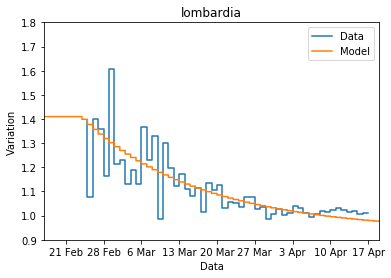

In [121]:
# data increment
incremento=[]
for i in range(1,len(ydata)):
    if ydata_inf[i] > 1:
        incremento.append(ydata_inf[i]/ydata_inf[i-1])
        
# sir increment
incr_SIR=[]
for i in range(len(i_vec)-1):
    incr_SIR.append(i_vec[i+1]/i_vec[i])

#general increment (function)
def incr_SIR_fun(N,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720)):
    fin_result=time_evo(N,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720))
    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]
    
    incr_SIR=[]
    for i in range(len(i_vec)-1):
        incr_SIR.append(i_vec[i+1]/i_vec[i])
        
    return np.array(incr_SIR)


if fit_region   == 'Sud':
    plt.step(xdata[ydata>=1]+17,incremento,label='Data')
else:
    plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:]+dt,incr_SIR,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.title(fit_region)
plt.xticks(np.arange(14,72,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(10,72)
plt.ylim(0.9,1.8)
plt.legend()
plt.savefig('output/first_derivative_SIR_band_v3_'+fit_region+'.png',dpi=300)
plt.show()

# Predictions (best fit)

In [ ]:
plt.figure(figsize=(12,12))
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t+dt, s_vec, 'b--', label='Susceptible')
#plt.plot(t+dt, i_vec, 'y--', label='Infected/3')
plt.plot(t+dt, i_vec/3, 'r--', label='Infected/3')
plt.plot(t+dt, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t+dt, m_vec, 'k--', label='Deaths')
plt.title(fit_region)
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(0,180)
plt.ylim(1,0.2*10**7)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('output/sirdatacomp_prediction_v3_'+fit_region+'.png',dpi=300)
plt.show()


# Combined plot

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t+dt, s_vec, 'b--')
plt.plot(t+dt, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t+dt, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t+dt, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,72,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(10,72)
plt.ylim(1,2*10**5)
plt.xlabel('Data')
plt.ylabel('Counter')
if fit_region   == 'Nord' or fit_region   == 'NoLombardia' or fit_region   == 'Lombardia':
    plt.legend(loc=4)
else:
    plt.legend(loc=2)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.subplot(1,3,2)
plt.title(fit_region)
if fit_region   == 'Sud':
    plt.step(xdata[ydata>=1]+17,incremento,label='Data')
else:
    plt.step(xdata[xdata>=1]+17,incremento,label='Data')
#plt.step(xdata[ydata>1]+17,incremento,label='Data')
plt.step(t[1:]+dt,incr_SIR,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,72,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(10,72)
plt.ylim(1,1.7)
plt.legend()

plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t+dt, s_vec, 'b--', label='Susceptible')
plt.plot(t+dt, i_vec/3, 'r--', label='Infected/3')
plt.plot(t+dt, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t+dt, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,0.7*10**7)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/combined_SIR_v3_'+fit_region+'.png',dpi=300)
plt.show()

In [ ]:
print('Total deaths ',int(m_vec[-1]))
print('Total infected ',int(m_vec[-1]+r_vec[-1]))
print('Maximum infected ',int(i_vec.max()/3))
print('Maximum infected (hospitalized)',int(i_vec.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec.max()/3*7/100))

# Export of the model

In [ ]:
# Starting time for the model according to each region
if fit_region   ==   'nord':
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-12') 
elif fit_region == 'centro':
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-17')
elif fit_region ==    'sud':
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-19') 
elif fit_region ==  'isole':
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-23')
elif fit_region == 'italia': 
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-07')
elif fit_region == 'nolombardia': 
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-11')
elif fit_region == 'lombardia': 
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-07')

# Starting time for the data - All regions
data_t        = pd.to_datetime(xdata,unit='D',origin='2020-02-24') 

# Model dataframe
export = pd.DataFrame({'S':np.around(s_vec,0), 'I': np.around(i_vec,0), 'R':np.around(r_vec+m_vec,0), 'sintomatici_modello':np.around(i_vec/3,0)})
export.index = new_t

# Data dataframe
new_ydata_inf = pd.DataFrame({'sintomatici_data':np.around(ydata_inf,0)})
new_ydata_inf.index = data_t

# Join and export
joint_frames = export.join(new_ydata_inf,on=export.index)
export2 = joint_frames.iloc[:200,:]
export2.index.name='data'
export2.to_csv('output/export_'+fit_region+'_work.csv',index=True)


# Minimizer (one parameter)

In [126]:
def minimizer_1var(beta1):
    # Function to minimize: time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365))
    # Try to keep beta1 stable because is characteristic of the epidemy
    # Play with t_tresh, beta2 and death_rate
    # Results are plotted in the next cell
    
    fin_result=time_evo(N,0.415,25.85,1/14,8,t_tresh=17,I0=1,t=np.arange(0,720)) # Nord + 0 giorni
    dt = 0
    
    t    =fin_result[0]+dt
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check = i_vec[17-dt:17+len(ydata)-dt]/3
    data_check    = ydata_inf
    accuracy=round(np.mean(np.abs((data_check[data_check>=1]-modello_check[data_check>=1]))/data_check[data_check>=1])*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17-dt:17+len(ydata)-dt]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check[data_death_check>=1]-modello_death_check[data_death_check>=1]))/data_death_check[data_death_check>=1])*100,2)

    return accuracy, accuracy_death

minimizer_1var_vec=np.vectorize(minimizer_1var)

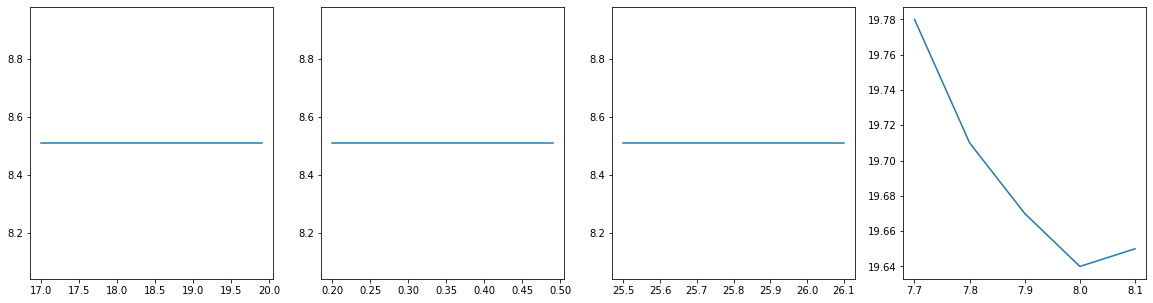

In [132]:
tgrid=np.arange(17,20,0.1)  # Grid for t_thres
beta1grid=np.arange(0.2,0.5,0.01)  # Grid for Beta1
beta2grid=np.arange(25.5,26.1,0.05)      # Grid for Beta2
deathgrid=np.arange(7.7,8.2,0.1)  # Grid for Death rate

ty,q=minimizer_1var_vec(tgrid)
beta1y,q=minimizer_1var_vec(beta1grid)
beta2y,q=minimizer_1var_vec(beta2grid)
q,deathy=minimizer_1var_vec(deathgrid)


plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(tgrid,ty)

plt.subplot(1,4,2)
plt.plot(beta1grid,beta1y)

plt.subplot(1,4,3)
plt.plot(beta2grid,beta2y)

plt.subplot(1,4,4)
plt.plot(deathgrid,deathy)
plt.show()

# Comparison Lombardia Vs Rest of the country

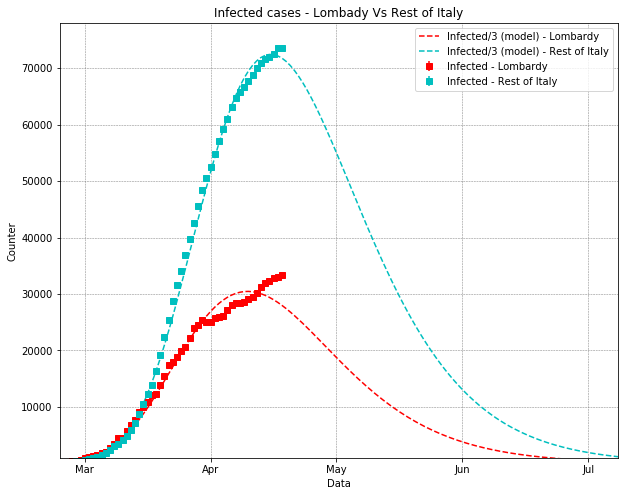

In [28]:
plt.figure(figsize=(10,8))

plt.errorbar(xdata_Lombardia,ydata_Lombardia,np.sqrt(ydata_Lombardia),color='red',linestyle='None',marker='s',label='Infected - Lombardy')
plt.plot(xmodel_Lombardia, ymodel_Lombardia, 'r--',label='Infected/3 (model) - Lombardy')

plt.errorbar(xdata_NoLombardia,ydata_NoLombardia,np.sqrt(ydata_NoLombardia),color='c',linestyle='None',marker='s',label='Infected - Rest of Italy')
plt.plot(xmodel_NoLombardia, ymodel_NoLombardia, 'c--',label='Infected/3 (model) - Rest of Italy')

plt.title('Infected cases - Lombady Vs Rest of Italy')
#plt.yscale('log')


plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(17,150)
plt.ylim(1000,7.8*10**4)

#plt.xlim(60,75)
#plt.ylim(70000,74000)


plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)



#plt.savefig('output/infected_Lombardia_NoLombardia_lin.png',dpi=300)
plt.show()